In [15]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
engine = create_engine('presto://glontok@ec2-3-17-67-13.us-east-2.compute.amazonaws.com:8889/hive/glontok')

In [6]:
sql = '''
SELECT vendors.VendName, AVG(product_vendors.DaysToDeliver) AS avg_days_to_deliver
FROM mysql.sales_orders.vendors
JOIN mysql.sales_orders.product_vendors
  ON vendors.VendorID = product_vendors.VendorID
GROUP BY vendors.VendName
'''

In [7]:
df = pd.read_sql(sql, engine)

In [8]:
df.head()

,vendname,avg_days_to_deliver
0,ProFormance,6.000000
1,"Shinoman, Incorporated",2.000000
2,Nikoma of America,4.000000
3,Big Sky Mountain Bikes,10.818182
4,Lone Star Bike Supply,10.866667


In [9]:
df.tail()

,vendname,avg_days_to_deliver
5,Viscount,3.000000
6,Dog Ear,10.555556
7,Armadillo Brand,13.166667
8,"Kona, Incorporated",8.000000
9,Sun Sports Suppliers,11.600000


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,vendname,avg_days_to_deliver
0,ProFormance,6.000000
1,"Shinoman, Incorporated",2.000000
2,Nikoma of America,4.000000
3,Big Sky Mountain Bikes,10.818182
4,Lone Star Bike Supply,10.866667
5,Viscount,3.000000
6,Dog Ear,10.555556
7,Armadillo Brand,13.166667
8,"Kona, Incorporated",8.000000
9,Sun Sports Suppliers,11.600000


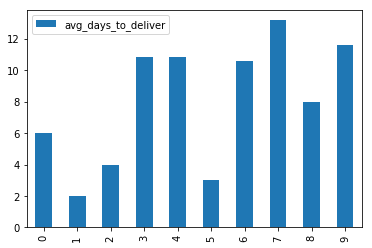

In [23]:
df.plot.bar()

In [11]:
from hdfs import InsecureClient
import os

In [12]:
# Connecting to Webhdfs by providing hdfs host ip and webhdfs port (50070 by default)
client_hdfs = InsecureClient('http://ec2-3-17-67-13.us-east-2.compute.amazonaws.com:50070')

In [13]:
# Writing Dataframe to hdfs
with client_hdfs.write('/user/hive/vendors_01.csv', encoding = 'utf-8') as writer:
    df.to_csv(writer)